# Data Analysis Project

## About Dataset

### Dataset Overview:
This dataset contains comprehensive player statistics for the 2024/25 Premier League season. It includes detailed performance metrics for approximately 500 players across all teams, making it a valuable resource for football analytics, machine learning models, and performance analysis.

### Dataset source:
https://www.kaggle.com/datasets/siddhrajthakor/fbref-premier-league-202425-player-stats-dataset

## 01 Dataset Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/PL_2024-25.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Joshua Acheampong,eng ENG,DF,Chelsea,18.0,2006.0,4,2,170,...,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
2,3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,...,0.00,0.14,0.14,0.00,0.14,0.07,0.05,0.12,0.07,0.12
3,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.06,0.06,0.13,0.06,0.13,0.06,0.01,0.07,0.06,0.07
4,5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,...,0.16,0.16,0.33,0.16,0.33,0.20,0.20,0.40,0.20,0.40


### 01.1 Number of Rows and Columns:

In [3]:
df.shape

(574, 36)

### 01.2 Index:

In [4]:
df.index

RangeIndex(start=0, stop=574, step=1)

### 01.3 Info:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          574 non-null    int64  
 1   Player      574 non-null    object 
 2   Nation      570 non-null    object 
 3   Pos         574 non-null    object 
 4   Squad       574 non-null    object 
 5   Age         570 non-null    float64
 6   Born        570 non-null    float64
 7   MP          574 non-null    int64  
 8   Starts      574 non-null    int64  
 9   Min         574 non-null    int64  
 10  90s         574 non-null    float64
 11  Gls         574 non-null    int64  
 12  Ast         574 non-null    int64  
 13  G+A         574 non-null    int64  
 14  G-PK        574 non-null    int64  
 15  PK          574 non-null    int64  
 16  PKatt       574 non-null    int64  
 17  CrdY        574 non-null    int64  
 18  CrdR        574 non-null    int64  
 19  xG          574 non-null    f

## 02 Data Types

### 02.1 The Data Type of each Column:

In [6]:
df.dtypes

Rk              int64
Player         object
Nation         object
Pos            object
Squad          object
Age           float64
Born          float64
MP              int64
Starts          int64
Min             int64
90s           float64
Gls             int64
Ast             int64
G+A             int64
G-PK            int64
PK              int64
PKatt           int64
CrdY            int64
CrdR            int64
xG            float64
npxG          float64
xAG           float64
npxG+xAG      float64
PrgC            int64
PrgP            int64
PrgR            int64
Gls.1         float64
Ast.1         float64
G+A.1         float64
G-PK.1        float64
G+A-PK        float64
xG.1          float64
xAG.1         float64
xG+xAG        float64
npxG.1        float64
npxG+xAG.1    float64
dtype: object

### 02.2 Number of data types in a DataFrame:

In [7]:
df.dtypes.value_counts()

float64    17
int64      15
object      4
Name: count, dtype: int64

### 02.3 Deviding Columns into String and Numeric:

In [8]:
string_colums = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include='number').columns.tolist()
df.loc[:, string_colums].head()

,Player,Nation,Pos,Squad
0,Max Aarons,eng ENG,DF,Bournemouth
1,Joshua Acheampong,eng ENG,DF,Chelsea
2,Tyler Adams,us USA,MF,Bournemouth
3,Tosin Adarabioyo,eng ENG,DF,Chelsea
4,Simon Adingra,ci CIV,"FW,MF",Brighton


In [9]:
df.loc[:, numeric_columns].tail()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
569,570,39.0,1985.0,32,19,1875,20.8,1,3,4,...,0.05,0.14,0.19,0.05,0.19,0.01,0.11,0.12,0.01,0.12
570,571,21.0,2002.0,36,35,3109,34.5,0,1,1,...,0.00,0.03,0.03,0.00,0.03,0.04,0.02,0.06,0.04,0.06
571,572,27.0,1996.0,15,5,527,5.9,0,1,1,...,0.00,0.17,0.17,0.00,0.17,0.11,0.03,0.14,0.11,0.14
572,573,23.0,2001.0,32,14,1402,15.6,3,1,4,...,0.19,0.06,0.26,0.19,0.26,0.31,0.10,0.41,0.31,0.41
573,574,25.0,1998.0,30,26,2325,25.8,3,8,11,...,0.12,0.31,0.43,0.08,0.39,0.19,0.21,0.40,0.16,0.37


## 03 NaN Analysis

### 03.1 Determining the number of NaN values:

In [10]:
df.isna().sum()

Rk            0
Player        0
Nation        4
Pos           0
Squad         0
Age           4
Born          4
MP            0
Starts        0
Min           0
90s           0
Gls           0
Ast           0
G+A           0
G-PK          0
PK            0
PKatt         0
CrdY          0
CrdR          0
xG            0
npxG          0
xAG           0
npxG+xAG      0
PrgC          0
PrgP          0
PrgR          0
Gls.1         0
Ast.1         0
G+A.1         0
G-PK.1        0
G+A-PK        0
xG.1          0
xAG.1         0
xG+xAG        0
npxG.1        0
npxG+xAG.1    0
dtype: int64

### 03.2 Percentage detection of NaN values:

In [11]:
nan_counts = df.isna().sum()
nan_counts_sorted = nan_counts.loc[nan_counts > 0].sort_values(ascending=False).to_frame(name="counts")
nan_counts_sorted["percentage"] = (nan_counts_sorted.counts*100)/df.shape[0]
round(nan_counts_sorted, 2)

,counts,percentage
Nation,4,0.7
Age,4,0.7
Born,4,0.7


### 03.3 Displaying Rows with NaN Values:

In [12]:
df[df.isna().any(axis=1)]

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
17,18,Olabade Aluko,NaN,DF,Leicester City,NaN,NaN,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
171,172,Jake Evans,NaN,FW,Leicester City,NaN,NaN,4,0,24,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
327,328,Mateus Mane,NaN,MF,Wolves,NaN,NaN,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
359,360,Jeremy Monga,NaN,"FW,MF",Leicester City,NaN,NaN,7,0,112,...,0.0,0.0,0.0,0.0,0.0,0.13,0.01,0.14,0.13,0.14


### 03.4 Replacing NaN Values with true information:

In [13]:
df.loc[17, 'Nation'] = 'eng ENG'
df.loc[171, 'Nation'] = 'eng ENG'
df.loc[327, 'Nation'] = 'eng ENG'
df.loc[359, 'Nation'] = 'eng ENG'

In [14]:
df.loc[17, 'Age'] = 17
df.loc[171, 'Age'] = 16
df.loc[327, 'Age'] = 17
df.loc[359, 'Age'] = 15

In [15]:
df.loc[17, 'Born'] = 2006
df.loc[171, 'Born'] = 2008
df.loc[327, 'Born'] = 2007
df.loc[359, 'Born'] = 2009

### 03.5 Removing unnecessary columns:

In [16]:
df.drop(['npxG.1', 'npxG+xAG.1', 'xG+xAG', 'G+A-PK', 'G-PK.1'], axis=1)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,xG.1,xAG.1
0,1,Max Aarons,eng ENG,DF,Bournemouth,24.0,2000.0,3,1,86,...,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00
1,2,Joshua Acheampong,eng ENG,DF,Chelsea,18.0,2006.0,4,2,170,...,0.0,0.2,0,8,0,0.00,0.00,0.00,0.12,0.00
2,3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,...,1.0,2.6,14,76,10,0.00,0.14,0.14,0.07,0.05
3,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.2,1.2,5,42,1,0.06,0.06,0.13,0.06,0.01
4,5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,...,2.5,4.9,50,18,136,0.16,0.16,0.33,0.20,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,570,Ashley Young,eng ENG,DF,Everton,39.0,1985.0,32,19,1875,...,2.3,2.6,24,90,32,0.05,0.14,0.19,0.01,0.11
570,571,Illia Zabarnyi,ua UKR,DF,Bournemouth,21.0,2002.0,36,35,3109,...,0.7,2.0,27,140,4,0.00,0.03,0.03,0.04,0.02
571,572,Oleksandr Zinchenko,ua UKR,"DF,MF",Arsenal,27.0,1996.0,15,5,527,...,0.2,0.8,10,48,14,0.00,0.17,0.17,0.11,0.03
572,573,Joshua Zirkzee,nl NED,"FW,MF",Manchester Utd,23.0,2001.0,32,14,1402,...,1.5,6.3,14,44,69,0.19,0.06,0.26,0.31,0.10


## 04 General Analysis

### 04.1 Basic Statistical Description of Numerical Values in Dataframe:

In [17]:
df.loc[:, numeric_columns].describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,...,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,287.500000,25.036585,1998.588850,20.151568,14.564460,1308.240418,14.535366,1.885017,1.400697,3.285714,...,0.108362,0.080767,0.189233,0.103659,0.184564,0.142909,0.094059,0.236603,0.138171,0.231777
std,165.843802,4.496311,4.523927,12.230609,12.304536,1053.645962,11.707284,3.537979,2.253498,5.218296,...,0.179531,0.156157,0.264714,0.172322,0.257252,0.287692,0.120146,0.329482,0.284002,0.324603
min,1.000000,15.000000,1985.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,144.250000,22.000000,1996.000000,9.000000,3.000000,331.250000,3.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.010000,0.050000,0.010000,0.050000
50%,287.500000,25.000000,1999.000000,21.000000,12.000000,1103.500000,12.250000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.090000,0.000000,0.085000,0.070000,0.060000,0.140000,0.070000,0.140000
75%,430.750000,28.000000,2002.000000,32.000000,25.000000,2204.000000,24.500000,2.000000,2.000000,4.000000,...,0.150000,0.127500,0.290000,0.140000,0.290000,0.190000,0.140000,0.347500,0.170000,0.340000
max,574.000000,39.000000,2009.000000,38.000000,38.000000,3420.000000,38.000000,29.000000,18.000000,47.000000,...,1.640000,2.650000,2.650000,1.640000,2.650000,5.060000,1.450000,5.060000,5.060000,5.060000


### 04.2 Basic Statistical Description of String Values in Dataframe:

In [18]:
df.loc[:, string_colums].describe()

,Player,Nation,Pos,Squad
count,574,574,574,574
unique,562,65,10,20
top,Evan Ferguson,eng ENG,DF,Southampton
freq,2,198,186,36


### 04.3 Bar Chart of Age Values:

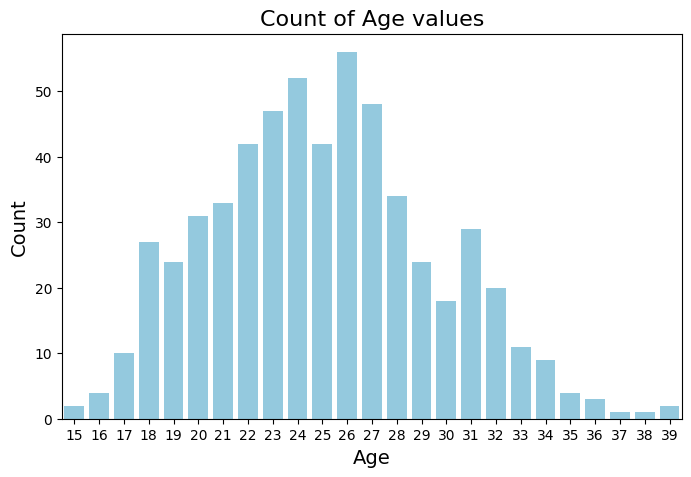

In [19]:
df_age_int = df['Age'].astype(int)
plt.figure(figsize=(8, 5))
sns.countplot(x=df_age_int, color='skyblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Age values', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 04.4 Players with Most Minutes Played:

In [20]:
df.groupby('Player')['Min'].sum().sort_values(ascending=False).head(15)

Player
Bernd Leno           3420
Nathan Collins       3420
David Raya           3420
Jordan Pickford      3420
Matz Sels            3420
Dean Henderson       3420
Bryan Mbeumo         3414
Mohamed Salah        3371
Moisés Caicedo       3351
Max Kilman           3348
Milos Kerkez         3336
Nikola Milenković    3330
Virgil van Dijk      3330
Dan Burn             3330
Joško Gvardiol       3277
Name: Min, dtype: int64

### 04.5 Tottenham Hotspur Squad:

In [21]:
tottenham_hotspur = df.loc[df.Squad == 'Tottenham', ['Player', 'Squad']]
tottenham_hotspur

,Player,Squad
37,Brandon Austin,Tottenham
52,Rodrigo Bentancur,Tottenham
55,Lucas Bergvall,Tottenham
59,Yves Bissouma,Tottenham
121,Kevin Danso,Tottenham
122,Ben Davies,Tottenham
145,Alfie Dorrington,Tottenham
150,Radu Drăgușin,Tottenham
187,Fraser Forster,Tottenham
211,Archie Gray,Tottenham


In [22]:
tottenham_df = df[df['Squad'] == 'Tottenham']
counts = tottenham_df[['Pos', 'Nation', 'Player']].value_counts()
counts

Pos    Nation   Player           
DF     ar ARG   Cristian Romero      1
       at AUT   Kevin Danso          1
       eng ENG  Alfie Dorrington     1
                Djed Spence          1
       es ESP   Pedro Porro          1
                Sergio Reguilón      1
       it ITA   Destiny Udogie       1
       nl NED   Micky van de Ven     1
       ro ROU   Radu Drăgușin        1
       wls WAL  Ben Davies           1
DF,MF  eng ENG  Archie Gray          1
FW     br BRA   Richarlison          1
       eng ENG  Dominic Solanke      1
                Mikey Moore          1
       fr FRA   Mathys Tel           1
       kr KOR   Son Heung-min        1
       wls WAL  Brennan Johnson      1
FW,MF  de GER   Timo Werner          1
       eng ENG  Dane Scarlett        1
                Will Lankshear       1
       fr FRA   Wilson Odobert       1
GK     cz CZE   Antonín Kinský       1
       eng ENG  Brandon Austin       1
                Fraser Forster       1
       it ITA   Guglielmo Vica

### 04.6 Players with most Goals:

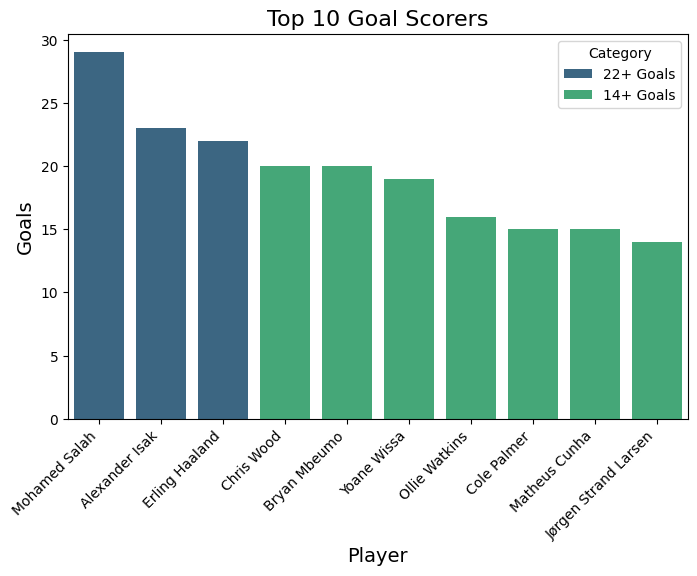

In [23]:
top_players = df.groupby('Player')['Gls'].sum().sort_values(ascending=False).head(10)
top_players_df = top_players.reset_index()
top_players_df.columns = ['Player', 'Goals']
top_players_df['Category'] = top_players_df['Goals'].apply(lambda x: '22+ Goals' if x >= 22 else '14+ Goals')
plt.figure(figsize=(8, 5))
sns.barplot(x='Player', y='Goals', hue='Category', data=top_players_df, palette='viridis')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.title('Top 10 Goal Scorers', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()

### 04.7 Players with most Assists:

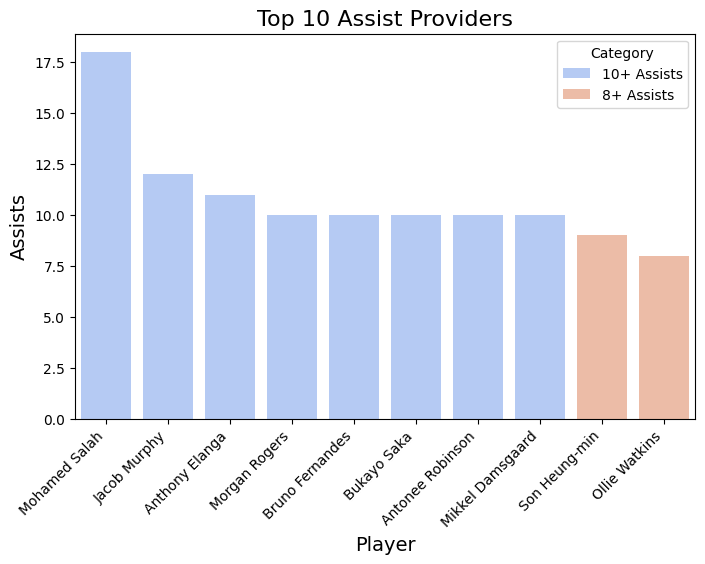

In [24]:
top_assists = df.groupby('Player')['Ast'].sum().sort_values(ascending=False).head(10)
top_assists_df = top_assists.reset_index()
top_assists_df.columns = ['Player', 'Assists']
top_assists_df['Category'] = top_assists_df['Assists'].apply(lambda x: '10+ Assists' if x >= 10 else '8+ Assists')
plt.figure(figsize=(8, 5))
sns.barplot(x='Player', y='Assists', hue='Category', data=top_assists_df, palette='coolwarm')
plt.xlabel('Player', fontsize=14)
plt.ylabel('Assists', fontsize=14)
plt.title('Top 10 Assist Providers', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.show()

### 04.8 Players with most Yellow Cards:

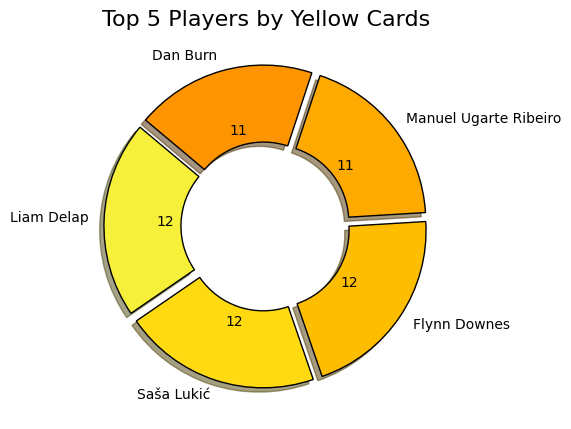

In [25]:
top_yellow = df.groupby('Player')['CrdY'].sum().sort_values(ascending=False).head(5)
palette = sns.color_palette("Wistia", 5)
plt.figure(figsize=(8, 5))
explode = [0.05]*len(top_yellow)
plt.pie(
    top_yellow,
    labels=top_yellow.index,
    autopct=lambda p: f'{int(round(p*top_yellow.sum()/100))}',
    startangle=140,
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'width': 0.5},
    explode=explode,
    shadow=True
)
plt.title('Top 5 Players by Yellow Cards', fontsize=16)
plt.show()

### 04.9 Players with most Red Cards:

In [26]:
df.groupby('Player')['CrdR'].sum().sort_values(ascending=False).head(5)

Player
Jack Stephens         2
Bruno Fernandes       2
Myles Lewis-Skelly    2
Andrew Robertson      1
Fabian Schär          1
Name: CrdR, dtype: int64

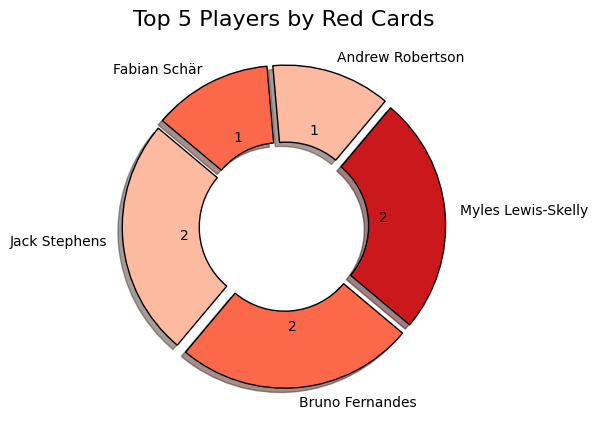

In [27]:
top_red = df.groupby('Player')['CrdR'].sum().sort_values(ascending=False).head(5)
palette = sns.color_palette("Reds", 3)
plt.figure(figsize=(8, 5))
explode = [0.05]*len(top_red)
plt.pie(
    top_red,
    labels=top_red.index,
    autopct=lambda p: f'{int(round(p*top_red.sum()/100))}',
    startangle=140,
    colors=palette,
    wedgeprops={'edgecolor': 'black', 'width': 0.5},
    explode=explode,
    shadow=True
)
plt.title('Top 5 Players by Red Cards', fontsize=16)
plt.show()

### 04.10 Team Stats:

In [28]:
team_stats = df.groupby("Squad").agg({
    "Gls": 'sum',
    "Ast": 'sum',
    "G+A": 'sum',
    "xG": 'sum',
    "xAG": 'sum'
})
team_stats

,Gls,Ast,G+A,xG,xAG
Squad,,,,,
Arsenal,67,55,122,62.3,46.6
Aston Villa,56,45,101,57.6,42.0
Bournemouth,57,41,98,65.4,44.1
Brentford,65,44,109,60.7,42.9
Brighton,64,41,105,59.5,40.5
Chelsea,61,47,108,69.4,53.5
Crystal Palace,49,38,87,61.5,46.9
Everton,39,27,66,42.7,32.8
Fulham,53,44,97,49.9,37.7


<Axes: xlabel='PrgC', ylabel='PrgP'>

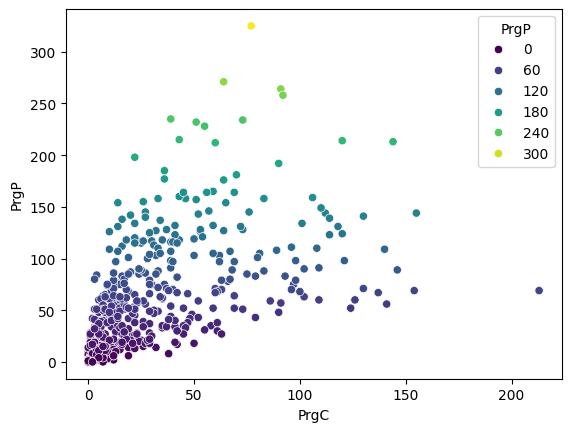

In [29]:
sns.scatterplot(data=df, x='PrgC', y='PrgP', hue='PrgP', palette='viridis')

### 04.11 Correlation Matrix of Numeric Columns:

In [30]:
numeric_col = df.select_dtypes(include='number')
corr_matrix = numeric_col.corr()
corr_matrix.Gls.sort_values(ascending=False)

Gls           1.000000
G-PK          0.986514
xG            0.945894
G+A           0.938935
npxG          0.928289
npxG+xAG      0.890099
Gls.1         0.712836
PrgR          0.695764
G-PK.1        0.662594
PKatt         0.655520
PK            0.646416
xAG           0.639420
G+A.1         0.632559
Ast           0.604244
G+A-PK        0.597510
PrgC          0.560433
MP            0.473489
Starts        0.450129
Min           0.445140
90s           0.445127
xG+xAG        0.357777
PrgP          0.336679
npxG+xAG.1    0.326442
xG.1          0.304310
npxG.1        0.267044
Ast.1         0.253246
xAG.1         0.251955
CrdY          0.196764
Rk            0.076952
CrdR          0.072754
Age           0.060713
Born         -0.057914
Name: Gls, dtype: float64

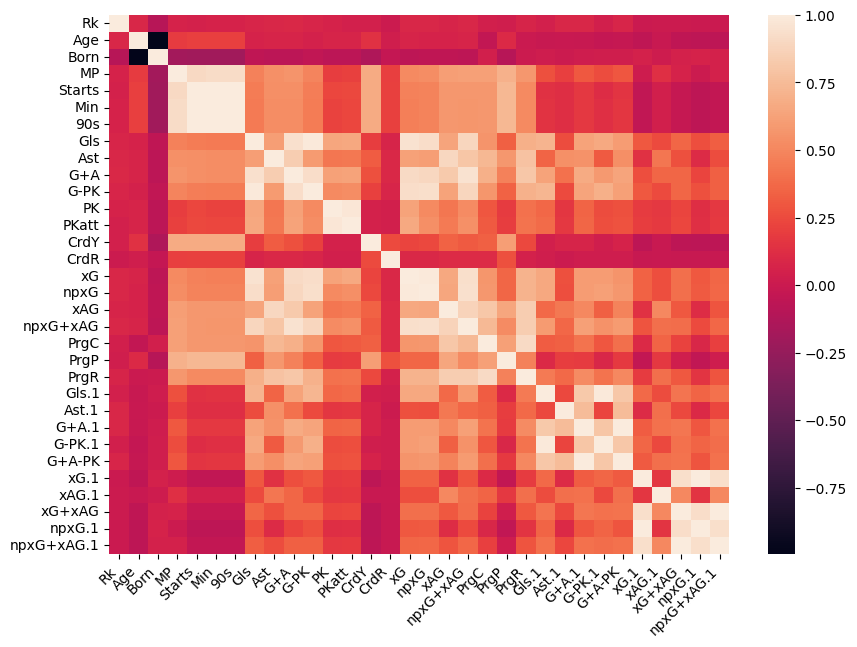

In [32]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix)
plt.xticks(rotation=45, ha='right')
plt.show()

### 04.12 Boxplot of Minutes Played per Player:

<Axes: ylabel='Min'>

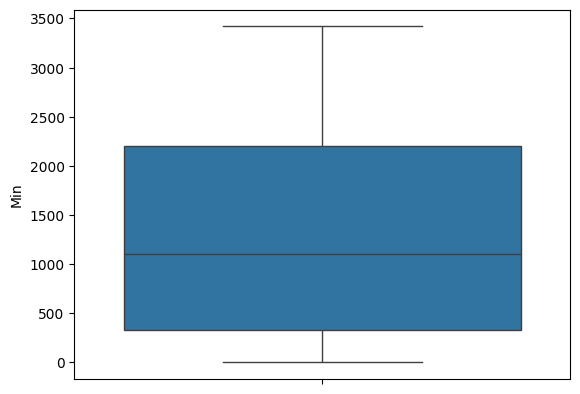

In [33]:
sns.boxplot(df.Min)

### 04.13 Number of Players per Nation:

In [34]:
df.Nation.value_counts()

Nation
eng ENG    198
br BRA      34
fr FRA      26
nl NED      22
pt POR      22
          ... 
gm GAM       1
xk KVX       1
is ISL       1
ms MSR       1
nz NZL       1
Name: count, Length: 65, dtype: int64

### 04.14 Age Boxplots:

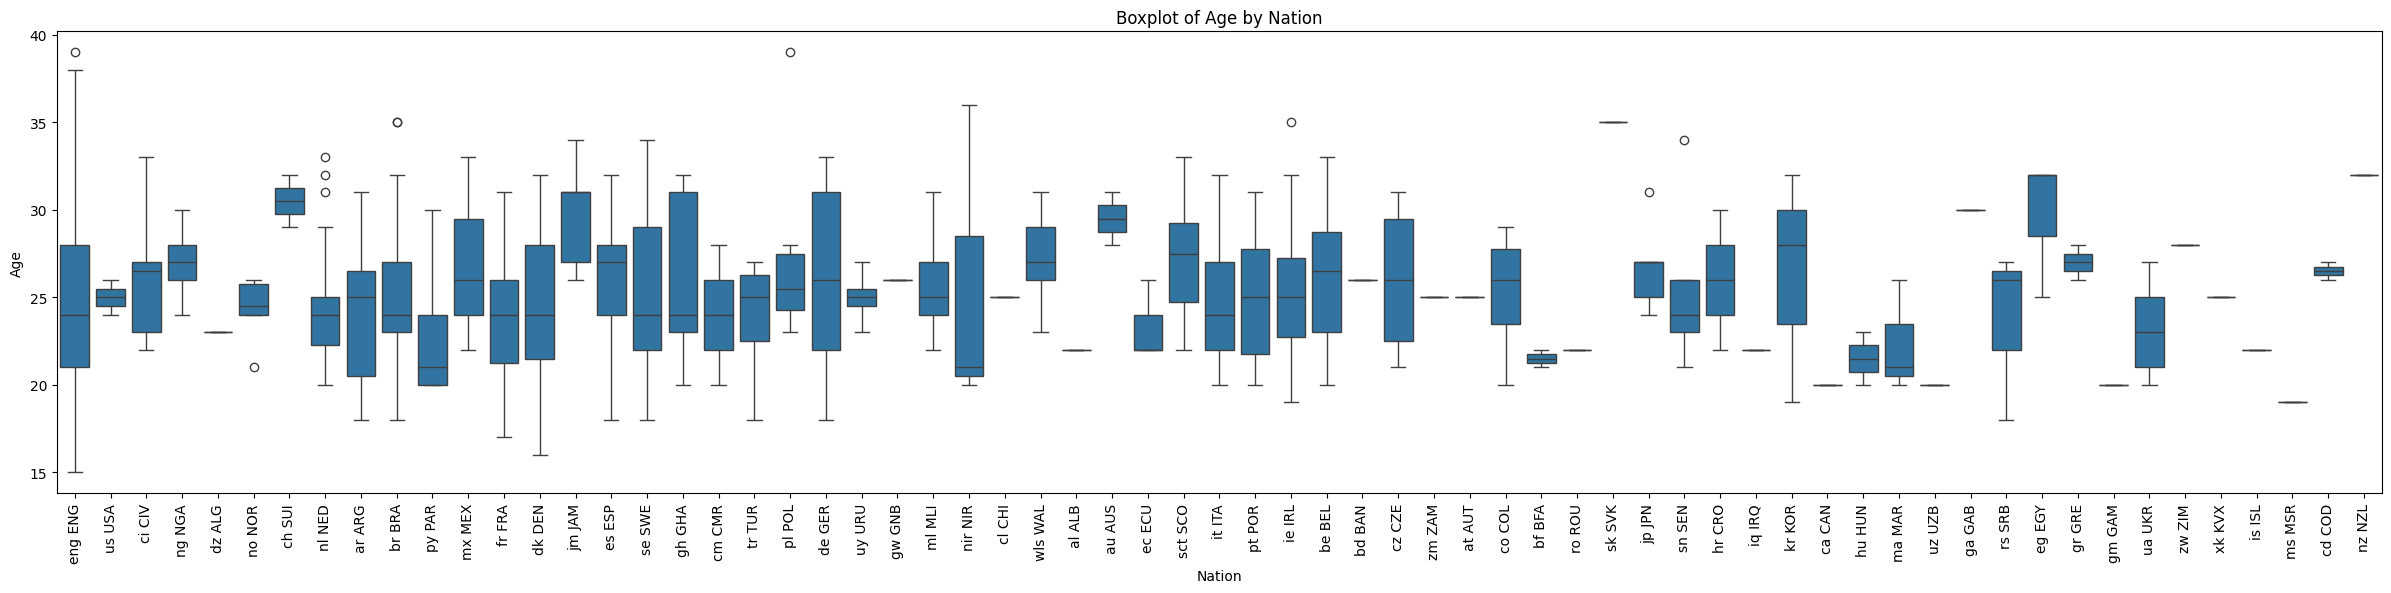

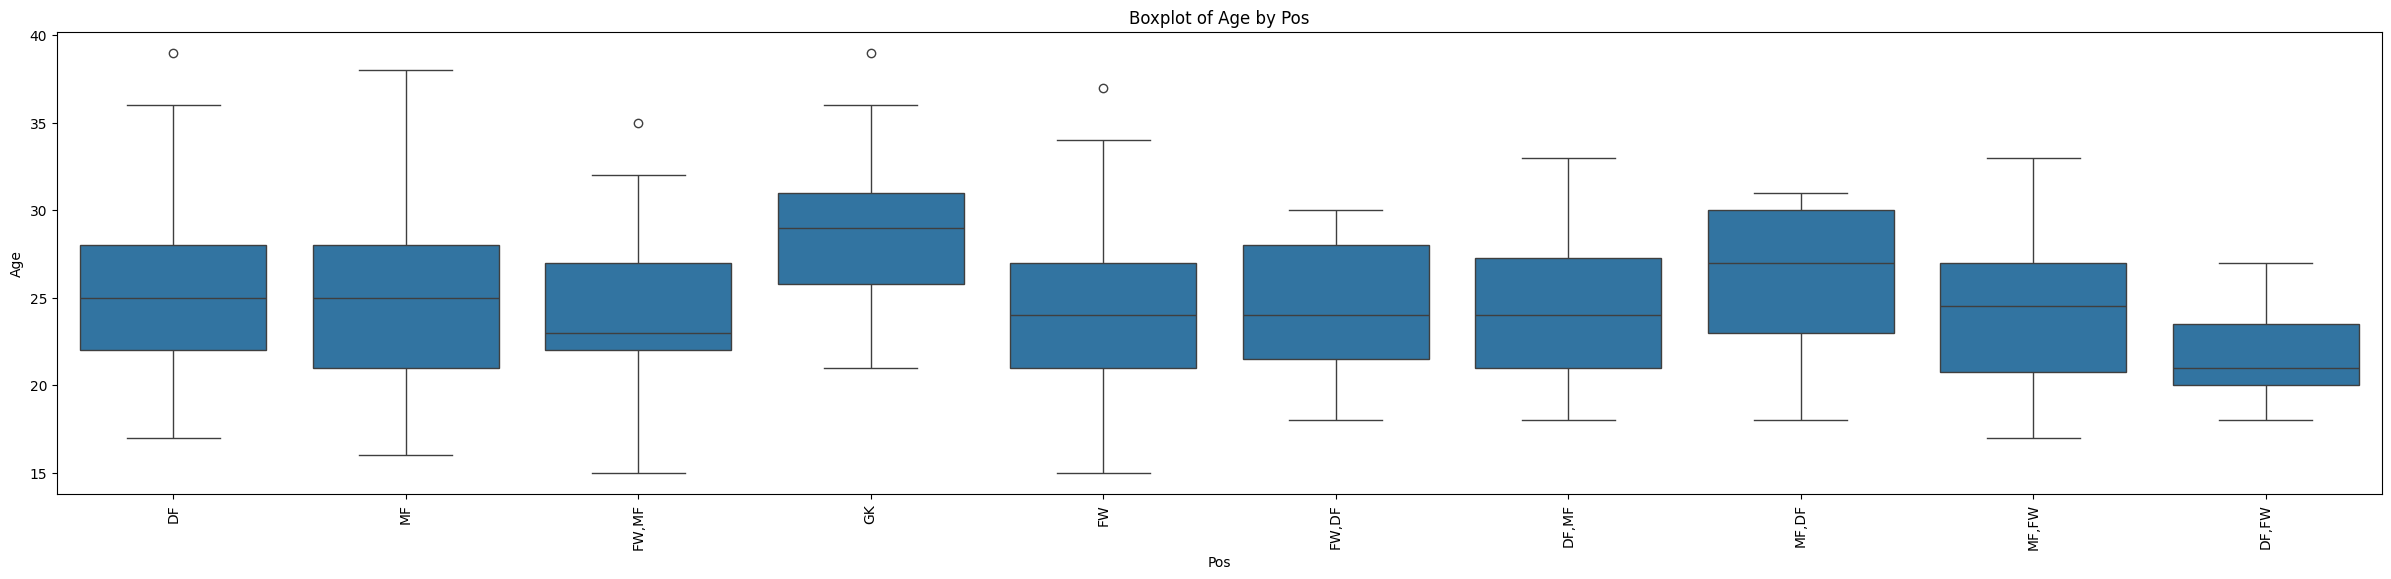

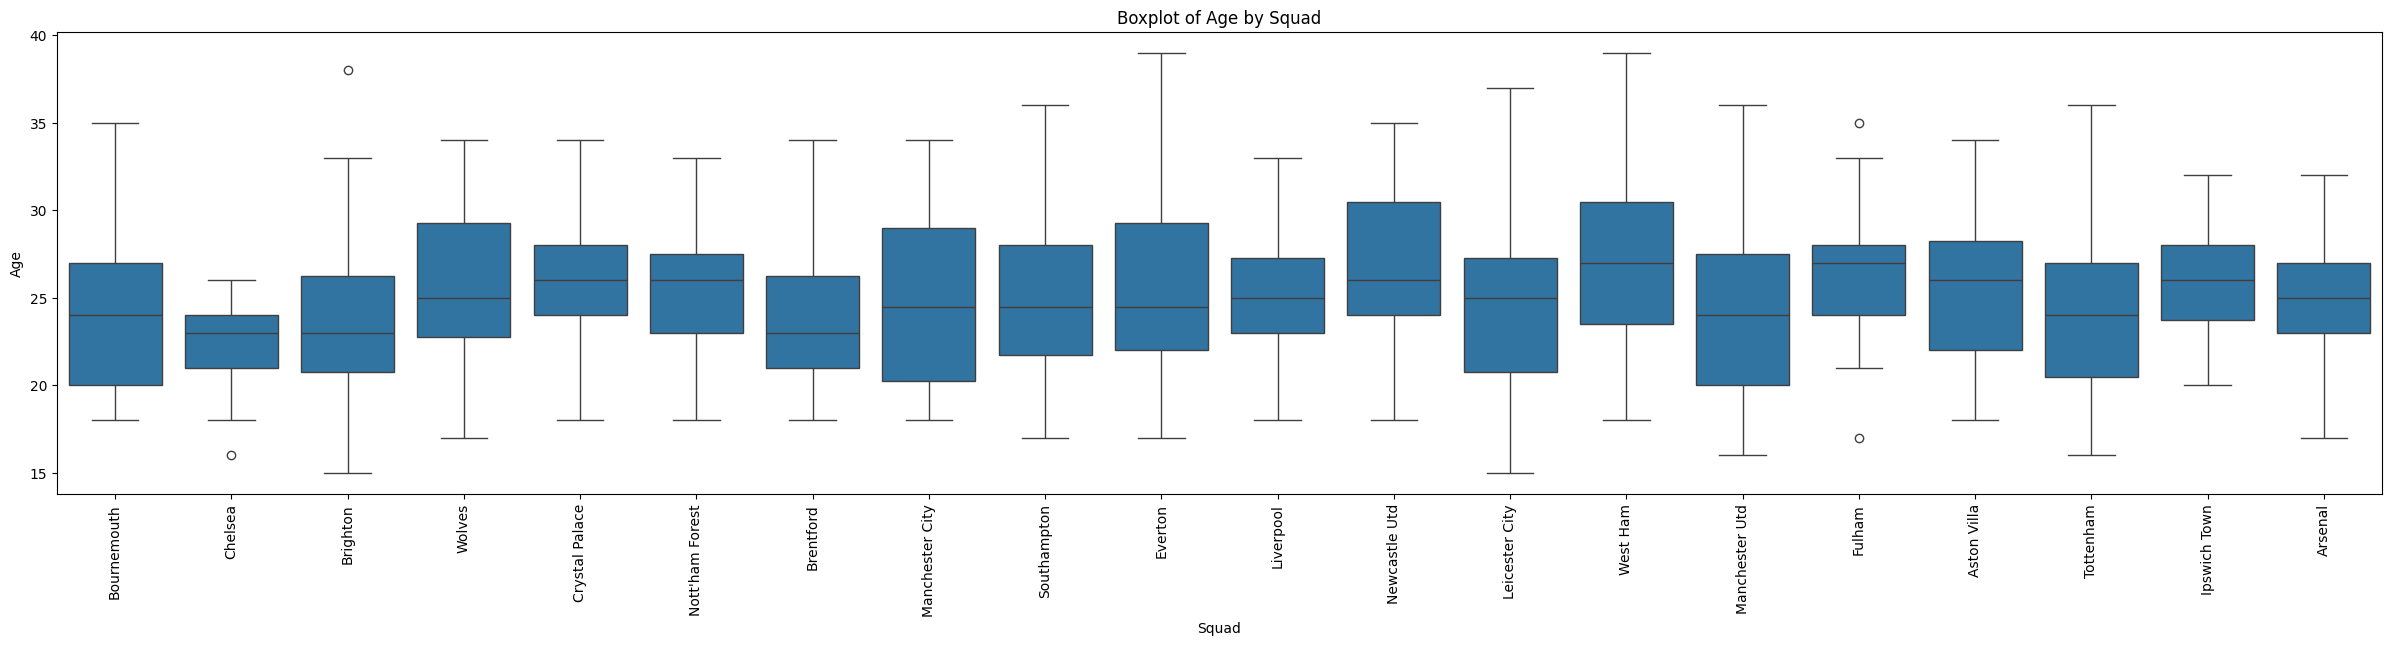

In [35]:
for col in df.select_dtypes(include='object').columns:
    if col == 'Player':
        continue
    plt.figure(figsize=(30, 6))
    sns.boxplot(x=col, y='Age', data=df)
    plt.title(f'Boxplot of Age by {col}')
    plt.xticks(rotation=90)

### 04.14 Minutes Played per Team:

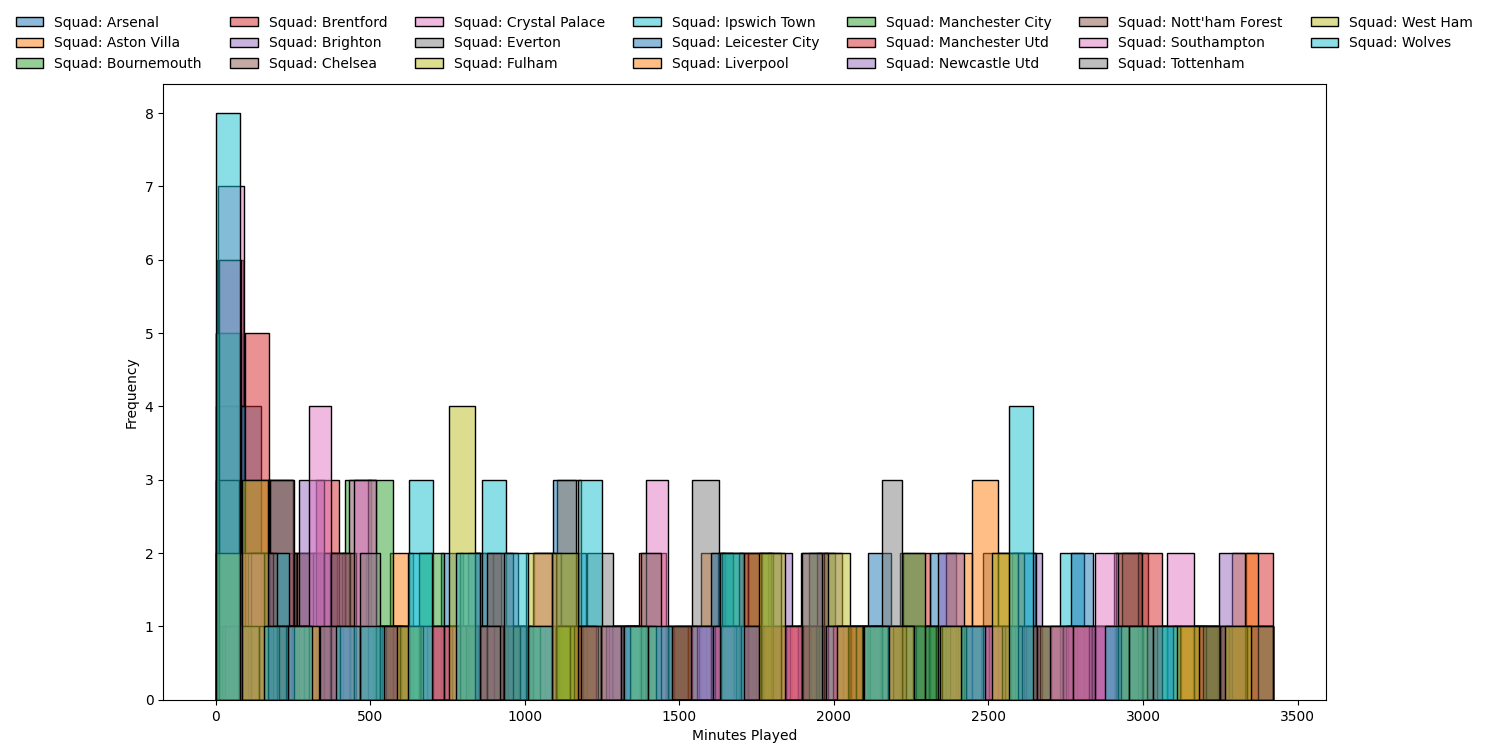

In [36]:
gls_per_nation = df.groupby('Squad')['Min']
plt.figure(figsize=(15, 8))
plt.frameon = False

for name, group in gls_per_nation:
   g = sns.histplot(group, bins=40, alpha=0.5, label=f'Squad: {name}')

plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.legend()
sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=7, frameon=False,)